# My First Convolutional Neural Network

## Fashion MNIST

#### 실습목표<br>
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on Fashion MNIST

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [6]:
'''
matplolib inline 명령어를 통해서
matplot으로 그리는 플롯들을 주피터 노트북 내에서 볼 수 있게 해준다.
포맷을 retina로 바꾸면 그래프의 화질이 훨씬 좋아진다.
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras import layers, models
from tensorflow.keras import backend

import random as rd
from sklearn.metrics import accuracy_score

### Data Loading

In [7]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [8]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [9]:
labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 4416
다음 그림은 Shirt 입니다.


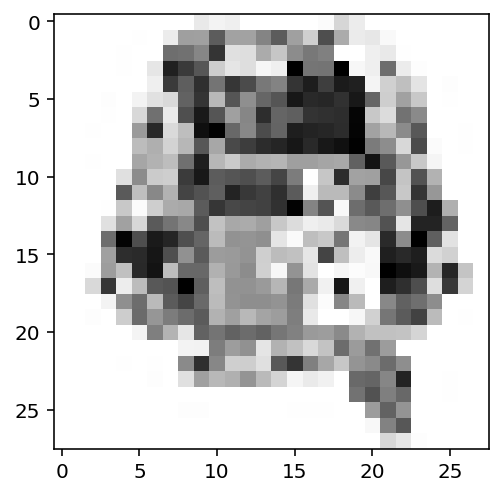

In [10]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')
plt.imshow(test_x[id], cmap='Greys')
plt.show()

### X : Min-Max Scaling

1. 최소값 0, 최대값 1로 통일하는 스케일링

In [12]:
max_n, min_n = train_x.max(), train_x.min()

In [13]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [14]:
train_x.max(), train_x.min()

(1.0, 0.0)

### X : Reshape(# of data, 28, 28, 1)

**끝에 1을 달아서 그레이스케일(흑백)을 명시해준다.**

In [16]:
_, h, w = train_x.shape

In [17]:
# train_x.reshape(-1, 28, 28, 1)
train_x = train_x.reshape(-1, h, w, 1)
test_x = test_x.reshape(-1, h, w, 1)

In [18]:
train_x.shape

(60000, 28, 28, 1)

### Y : One-Hot Encoding

In [19]:
from tensorflow.keras.utils import to_categorical

In [21]:
type(train_y)

numpy.ndarray

In [23]:
class_n = len(np.unique(train_y))

In [24]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [25]:
train_x.shape, train_y.shape

((60000, 28, 28, 1), (60000, 10))

### 코드를 완성해주세요!

**자유롭게 먼저 해보는 것을 추천**




**구조를 따라서 코딩을 한다면..**

1. 인풋레이어
1. Convolution : 필터수 32개, 사이즈(3, 3), same padding
2. BatchNormalization
2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
3. BatchNormalization
4. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
5. DropOut : 25% 비활성화
1. Convolution : 필터수 64개, 사이즈(3, 3), same padding
3. BatchNormalization
2. Convolution : 필터수 64개, 사이즈(3, 3), same padding
3. BatchNormalization
4. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
5. DropOut : 25% 비활성화
6. Flatten()
7. Fully Connected Layer : 노드 512개
3. BatchNormalization
9. 아웃풋레이어

In [28]:
## Sequantial API
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 발판 생성 : 레이어 블록을 쌓을
model = keras.models.Sequential()

# 3. 레이어 조립 : .add()
# 인풋레이어
model.add( keras.layers.Input(shape=(28,28,1)) )

# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters=32,
                               kernel_size=(3,3),
                               strides=(1,1),
                               padding='same',
                               activation='relu') )
# BatchNormalization
model.add( keras.layers.BatchNormalization() )

# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters=32,
                               kernel_size=(3,3),
                               strides=(1,1),
                               padding='same',
                               activation='relu'))

# BatchNormalization
model.add( keras.layers.BatchNormalization() )

# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add( keras.layers.MaxPool2D(pool_size=(2,2),
                                  strides=(2,2)) )

# DropOut : 25% 비활성화
model.add( keras.layers.Dropout(0.25) )

# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters=64,
                               kernel_size=(3,3),
                               strides=(1,1),
                               padding='same',
                               activation='relu'))

# BatchNormalization
model.add( keras.layers.BatchNormalization() )

# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters=64,
                               kernel_size=(3,3),
                               strides=(1,1),
                               padding='same',
                               activation='relu'))

# BatchNormalization
model.add( keras.layers.BatchNormalization() )

# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add( keras.layers.MaxPool2D(pool_size=(2,2),
                                  strides=(2,2)) )

# DropOut : 25% 비활성화
model.add( keras.layers.Dropout(0.25) )

# Flatten()
model.add( keras.layers.Flatten() )

# Fully Connected Layer : 노드 512개
model.add( keras.layers.Dense(512, activation='relu') )

# BatchNormalization
model.add( keras.layers.BatchNormalization() )

# 아웃풋레이어
model.add( keras.layers.Dense(10, activation='softmax') )

# 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

In [43]:
## Functional API
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 레이어 사슬처럼 엮기
# 인풋레이어
il = keras.layers.Input(shape=(28,28,1))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
cl = keras.layers.Conv2D(filters=32,
                         kernel_size=(3,3),
                         padding='same',
                         strides=(1,1),
                         activation='relu')(il)
# BatchNormalization
bl = keras.layers.BatchNormalization()(cl)
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
cl = keras.layers.Conv2D(filters=32,
                         kernel_size=(3,3),
                         padding='same',
                         strides=(1,1),
                         activation='relu')(bl)
# BatchNormalization
bl = keras.layers.BatchNormalization()(cl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
ml = keras.layers.MaxPool2D(pool_size=(2,2),
                            strides=(2,2))(bl)
# DropOut : 25% 비활성화
dl = keras.layers.Dropout(0.25)(ml)

# Convolution : 필터수 64개, 사이즈(3, 3), same padding
cl = keras.layers.Conv2D(filters=64,
                         kernel_size=(3,3),
                         padding='same',
                         strides=(1,1),
                         activation='relu')(dl)
# BatchNormalization
bl = keras.layers.BatchNormalization()(cl)
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
cl = keras.layers.Conv2D(filters=64,
                         kernel_size=(3,3),
                         padding='same',
                         strides=(1,1),
                         activation='relu')(bl)
# BatchNormalization
bl = keras.layers.BatchNormalization()(cl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
ml = keras.layers.MaxPool2D(pool_size=(2,2),
                            strides=(2,2))(bl)
# DropOut : 25% 비활성화
dl = keras.layers.Dropout(0.25)(ml)

# Flatten()
fl = keras.layers.Flatten()(dl)
# Fully Connected Layer : 노드 512개
hl = keras.layers.Dense(512, activation='relu')(fl)
# BatchNormalization
bl = keras.layers.BatchNormalization()(hl)
# 아웃풋레이어
ol = keras.layers.Dense(10, activation='softmax')(bl)

# 3. 모델의 시작과 끝 지정
model = keras.models.Model(il, ol)

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

# 요약
# model.summary()

### Early Stopping을 활용한 학습

1. validation_split = 0.2
2. 1 epochs만 관찰해가며 속도가 가장 빠른 batch_size 찾아보기. 128개부터 시작하여 조절해볼 것.
3. EarlyStopping. val_loss가 4 epoch 전과 비교하여 개선되지 않으면 스탑


In [30]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
es = EarlyStopping(monitor='val_loss',        # 관측 대상
                   min_delta=0,               # 개선이라고 인정하기 위한 최소한의 값
                   patience=4,                # 개선되지 않을 때, 몇 번이나 참을 것인지
                   verbose=1,
                   restore_best_weights=True) # 최적의 가중치를 모델에 전달

In [44]:
model.fit(train_x, train_y, epochs=1000, batch_size=128, verbose=1,
          validation_split=0.2, callbacks=[es])

Epoch 1/1000
375/375 [==============================] - 6s 14ms/step - loss: 0.4168 - accuracy: 0.8512 - val_loss: 1.3180 - val_accuracy: 0.5767
Epoch 2/1000
375/375 [==============================] - 5s 13ms/step - loss: 0.2725 - accuracy: 0.9006 - val_loss: 0.2415 - val_accuracy: 0.9145
Epoch 3/1000
375/375 [==============================] - 5s 13ms/step - loss: 0.2315 - accuracy: 0.9151 - val_loss: 0.2377 - val_accuracy: 0.9156
Epoch 4/1000
375/375 [==============================] - 5s 13ms/step - loss: 0.2092 - accuracy: 0.9228 - val_loss: 0.2095 - val_accuracy: 0.9246
Epoch 5/1000
375/375 [==============================] - 5s 13ms/step - loss: 0.1906 - accuracy: 0.9291 - val_loss: 0.2186 - val_accuracy: 0.9202
Epoch 6/1000
375/375 [==============================] - 5s 14ms/step - loss: 0.1738 - accuracy: 0.9357 - val_loss: 0.1906 - val_accuracy: 0.9330
Epoch 7/1000
375/375 [==============================] - 5s 13ms/step - loss: 0.1536 - accuracy: 0.9434 - val_loss: 0.1957 - val_ac

In [ ]:
# batch size
# 128 : 6s
# 64 : 8s
# 256 : 6s
# 512 : 6s
# 32 : 10s